In [12]:
from matplotlib import pyplot as plt
import numpy as np

train_data = np.loadtxt(open("optdigits.tra","r"), delimiter=',', skiprows=0)
train_data = np.array(train_data, dtype=np.int8)

test_data = np.loadtxt(open("optdigits.tes","r"), delimiter=',', skiprows=0)
test_data = np.array(test_data, dtype=np.int8)

X_train = train_data[:,0:64]
y_train = train_data[:,64:65]

X_test = test_data[:,0:64]
y_test = test_data[:,64:65]

#print(y_train.shape)
#print(X_train[0:10])

In [13]:
#Sigmoid function = g(x) = 1/1+(e^-z)
def sigmoid(hyp):
    return np.array(1/(1 + np.exp((-1)*hyp)),dtype=np.float64)

In [14]:
# Cost funtion  = -ylog(h(x)) - (1-y)log(1-h(x))
def computeCost(X,y,theta):
    
    m=len(y)
    predictions=sigmoid(X.dot(theta))
    cost = y*np.log(predictions) + (1-y)*np.log(1-predictions)
    
    return -1*(1/m)*np.sum(cost)

print(computeCost(X_train,y_train,np.zeros((64,1))))

0.6931471805599452


In [15]:
# Cost funtion  = -ylog(h(x)) - (1-y)log(1-h(x)) + lambda*(||w||2)^2
def computeCostWithRegularization(X,y,l,theta):
    
    m=len(y)
    predictions=sigmoid(X.dot(theta))
    cost = y*np.log(predictions) + (1-y)*np.log(1-predictions)
    
    return -1*(1/m)*np.sum(cost) + l*np.sum(theta**2)

In [16]:
def predict(X, theta):
    return sigmoid(X.dot(theta))

In [17]:
def gradientDescent(X,y,theta,alpha,num_iters):
    
    #to overcome type error.
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64) 
    theta = np.array(theta, dtype=np.float64)
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = sigmoid(X.dot(theta))
        error = np.dot((predictions-y).transpose(),X)
        error = error.transpose()
        descent=alpha * (1/m) * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history


In [18]:
def gradientDescentWithRegularization(X,y,theta,alpha,l,num_iters):
    
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64) 
    theta = np.array(theta, dtype=np.float64)
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = sigmoid(X.dot(theta))
        error = np.dot((predictions-y).transpose(),X)
        error = error.transpose()
        
        descent = alpha * (1/m) * (error + l*theta)
        theta -= descent
        J_history.append(computeCostWithRegularization(X,y,l,theta))
    
    return theta, J_history

In [19]:
# As per the Andrew-Ng approach (One-vs-All), we need to convert multi-class into binary class and then 
# train logistic regression. This needs to be done for each multi-class, hence created a function that given the
# multi-class targets (y_multi) will convert it to binary class targets keeping the given class(class_number) 
# as positive class.

def convert_y_to_binary(y_multi, class_number):
    y_binary = np.zeros((len(y_multi),1))
    for i in range(len(y_multi)):
        if y_multi[i][0] == class_number:
            y_binary[i][0] = 1 
        else:
            y_binary[i][0] = 0
    return np.array(y_binary,dtype=np.int8)

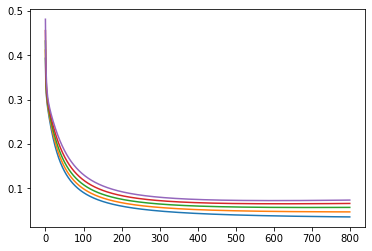

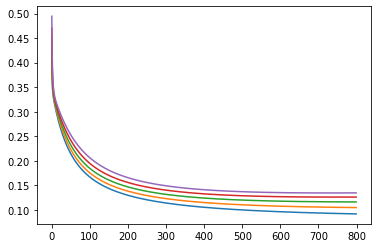

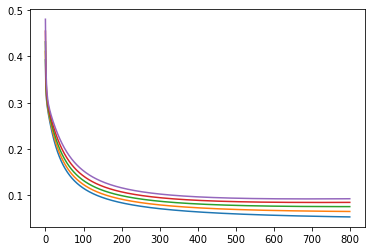

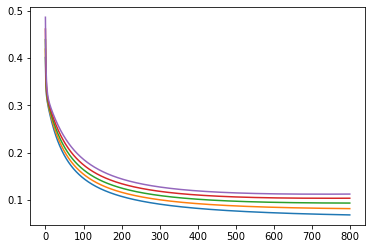

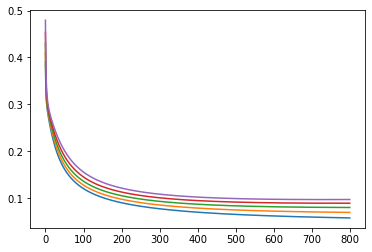

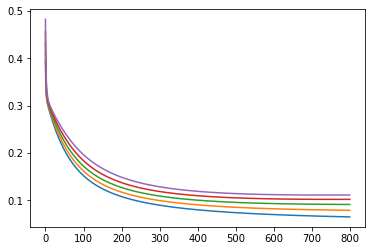

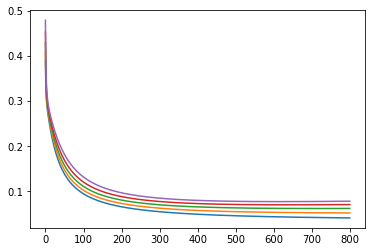

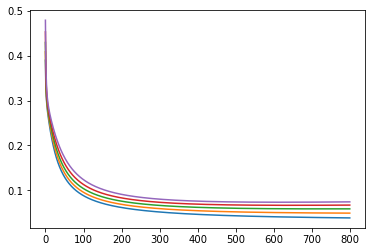

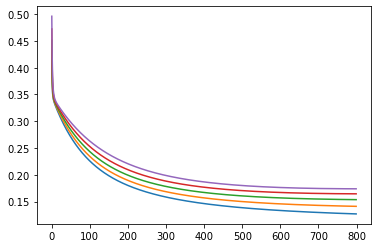

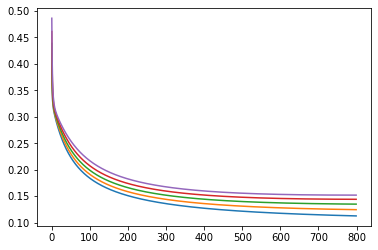

In [20]:
y_train_pred = []
y_train_pred_reg_1 = []
y_train_pred_reg_2 = []
y_train_pred_reg_3 = []
y_train_pred_reg_4 = []
y_train_pred_reg_5 = []

y_test_pred = []
y_test_pred_reg_1 = []
y_test_pred_reg_2 = []
y_test_pred_reg_3 = []
y_test_pred_reg_4 = []
y_test_pred_reg_5 = []

for i in range(10):
    y_bin = convert_y_to_binary(y_train,i)
    
    theta = np.zeros((64,1))
    theta, J_history = gradientDescent(X_train,y_bin,theta,0.007,400)
    
    theta_reg_1 = np.zeros((64,1))
    theta_reg_1, J_history_reg_1 = gradientDescentWithRegularization(X_train,y_bin,theta_reg_1,0.001,0.1,800)
    plt.plot(np.array(range(0,800),dtype=np.int16), J_history_reg_1)
    
    theta_reg_2 = np.zeros((64,1))
    theta_reg_2, J_history_reg_2 = gradientDescentWithRegularization(X_train,y_bin,theta_reg_2,0.0009,0.2,800)
    plt.plot(np.array(range(0,800),dtype=np.int16), J_history_reg_2)
    
    theta_reg_3 = np.zeros((64,1))
    theta_reg_3, J_history_reg_3 = gradientDescentWithRegularization(X_train,y_bin,theta_reg_3,0.0008,0.3,800)
    plt.plot(np.array(range(0,800),dtype=np.int16), J_history_reg_3)
    
    theta_reg_4 = np.zeros((64,1))
    theta_reg_4, J_history_reg_4 = gradientDescentWithRegularization(X_train,y_bin,theta_reg_4,0.0007,0.4,800)
    plt.plot(np.array(range(0,800),dtype=np.int16), J_history_reg_4)
    
    theta_reg_5 = np.zeros((64,1))
    theta_reg_5, J_history_reg_5 = gradientDescentWithRegularization(X_train,y_bin,theta_reg_5,0.0006,0.5,800)
    plt.plot(np.array(range(0,800),dtype=np.int16), J_history_reg_5)
    
    # I have plotted these graphs to determine the value of theta and the number of iterations.
    # If we analyze these, then for the given theta the error drops rapidly in the first few iterations
    # and flattens around 350-400 for all the classes.
    
    plt.show()
    
    #Training
    y_train_pred.append(predict(X_train, theta))
    y_train_pred_reg_1.append(predict(X_train, theta_reg_1))
    y_train_pred_reg_2.append(predict(X_train, theta_reg_2))
    y_train_pred_reg_3.append(predict(X_train, theta_reg_3))
    y_train_pred_reg_4.append(predict(X_train, theta_reg_4))
    y_train_pred_reg_5.append(predict(X_train, theta_reg_5))
    
    #Testing
    y_test_pred.append(predict(X_test, theta))
    y_test_pred_reg_1.append(predict(X_test, theta_reg_1))
    y_test_pred_reg_2.append(predict(X_test, theta_reg_2))
    y_test_pred_reg_3.append(predict(X_test, theta_reg_3))
    y_test_pred_reg_4.append(predict(X_test, theta_reg_4))
    y_test_pred_reg_5.append(predict(X_test, theta_reg_5))

In [21]:
y_train_pred = np.array(y_train_pred)
y_train_pred_reg_1 = np.array(y_train_pred_reg_1)
y_train_pred_reg_2 = np.array(y_train_pred_reg_2)
y_train_pred_reg_3 = np.array(y_train_pred_reg_3)
y_train_pred_reg_4 = np.array(y_train_pred_reg_4)
y_train_pred_reg_5 = np.array(y_train_pred_reg_5)

y_test_pred = np.array(y_test_pred)
y_test_pred_reg_1 = np.array(y_test_pred_reg_1)
y_test_pred_reg_2 = np.array(y_test_pred_reg_2)
y_test_pred_reg_3 = np.array(y_test_pred_reg_3)
y_test_pred_reg_4 = np.array(y_test_pred_reg_4)
y_test_pred_reg_5 = np.array(y_test_pred_reg_5)

def predict_class(y_pred):
    y_pred_class=[]
    y_pred_max_prob=[]
    for i in range(len(y_pred[0])):
        maximum=0
        index=0
        for j in range(len(y_pred)):
            if y_pred[j][i]>maximum:
                maximum=y_pred[j][i]
                index=j
        y_pred_class.append(index)
    y_pred_class = np.array(y_pred_class, dtype=np.int8)
    return y_pred_class

y_train_pred_class = predict_class(y_train_pred)
y_train_pred_class_reg_1 = predict_class(y_train_pred_reg_1)
y_train_pred_class_reg_2 = predict_class(y_train_pred_reg_2)
y_train_pred_class_reg_3 = predict_class(y_train_pred_reg_3)
y_train_pred_class_reg_4 = predict_class(y_train_pred_reg_4)
y_train_pred_class_reg_5 = predict_class(y_train_pred_reg_5)

y_test_pred_class = predict_class(y_test_pred)
y_test_pred_class_reg_1 = predict_class(y_test_pred_reg_1)
y_test_pred_class_reg_2 = predict_class(y_test_pred_reg_2)
y_test_pred_class_reg_3 = predict_class(y_test_pred_reg_3)
y_test_pred_class_reg_4 = predict_class(y_test_pred_reg_4)
y_test_pred_class_reg_5 = predict_class(y_test_pred_reg_5)


Training accuracy:
0.9636411195396286
Testing accuracy:
0.9348914858096828
Training error:
0.03635888046037139
Testing error:
0.06510851419031716

#############Confusion Matrix###############
[[374   0   0   0   1   0   1   0   0   0]
 [  0 369   4   0   0   0   0   2   9   5]
 [  0   1 369   2   0   0   1   1   5   1]
 [  0   0   1 374   0   4   0   1   2   7]
 [  1   4   0   0 364   0   3   1   4  10]
 [  0   1   2   1   0 366   0   0   0   6]
 [  0   2   0   0   1   1 373   0   0   0]
 [  0   0   1   2   1   0   0 382   0   1]
 [  1  11   2   1   2   2   3   0 357   1]
 [  1   7   0   3   5   2   0   4   4 356]]




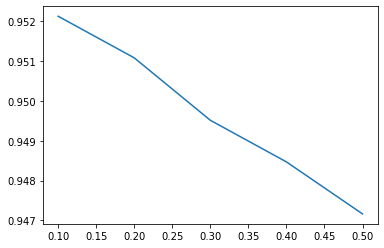

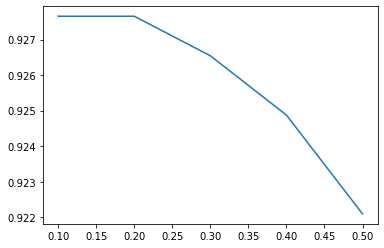

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

training_accuracy = accuracy_score(y_train[:,0], y_train_pred_class)
print ("Training accuracy:")
print (training_accuracy)

testing_accuracy = accuracy_score(y_test[:,0], y_test_pred_class)
print ("Testing accuracy:")
print (testing_accuracy)

training_error = 1-accuracy_score(y_train[:,0], y_train_pred_class)
print ("Training error:")
print (training_error)

testing_error = 1-accuracy_score(y_test[:,0], y_test_pred_class)
print ("Testing error:")
print (testing_error)

print ("\n#############Confusion Matrix###############")
print (confusion_matrix(y_train[:,0], y_train_pred_class))
print ("\n")
#print(classification_report())

training_accuracy_reg_1 = accuracy_score(y_train[:,0], y_train_pred_class_reg_1)
training_accuracy_reg_2 = accuracy_score(y_train[:,0], y_train_pred_class_reg_2)
training_accuracy_reg_3 = accuracy_score(y_train[:,0], y_train_pred_class_reg_3)
training_accuracy_reg_4 = accuracy_score(y_train[:,0], y_train_pred_class_reg_4)
training_accuracy_reg_5 = accuracy_score(y_train[:,0], y_train_pred_class_reg_5)

testing_accuracy_reg_1 = accuracy_score(y_test[:,0], y_test_pred_class_reg_1)
testing_accuracy_reg_2 = accuracy_score(y_test[:,0], y_test_pred_class_reg_2)
testing_accuracy_reg_3 = accuracy_score(y_test[:,0], y_test_pred_class_reg_3)
testing_accuracy_reg_4 = accuracy_score(y_test[:,0], y_test_pred_class_reg_4)
testing_accuracy_reg_5 = accuracy_score(y_test[:,0], y_test_pred_class_reg_5)

plt.plot([0.1,0.2,0.3,0.4,0.5], [training_accuracy_reg_1, training_accuracy_reg_2, 
                                 training_accuracy_reg_3, training_accuracy_reg_4, training_accuracy_reg_5])


plt.show()

plt.plot([0.1,0.2,0.3,0.4,0.5], [testing_accuracy_reg_1, testing_accuracy_reg_2, 
                                 testing_accuracy_reg_3, testing_accuracy_reg_4, testing_accuracy_reg_5])
plt.show()

[0.047868166361496156, 0.048914465079780256, 0.05048391315720635, 0.05153021187549045, 0.05283808527334555]


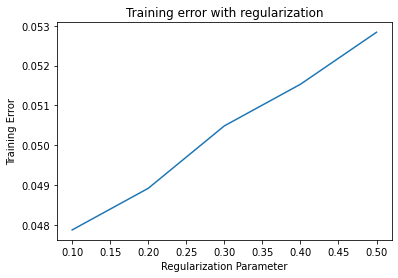

[0.07234279354479689, 0.07234279354479689, 0.07345575959933226, 0.07512520868113526, 0.07790762381747351]


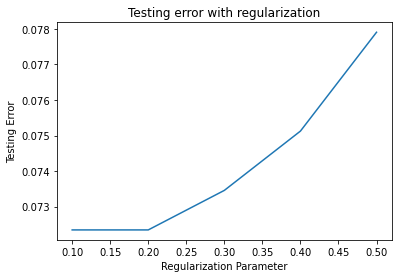

In [26]:
training_error_reg_1 = 1-accuracy_score(y_train[:,0], y_train_pred_class_reg_1)
training_error_reg_2 = 1-accuracy_score(y_train[:,0], y_train_pred_class_reg_2)
training_error_reg_3 = 1-accuracy_score(y_train[:,0], y_train_pred_class_reg_3)
training_error_reg_4 = 1-accuracy_score(y_train[:,0], y_train_pred_class_reg_4)
training_error_reg_5 = 1-accuracy_score(y_train[:,0], y_train_pred_class_reg_5)

testing_error_reg_1 = 1-accuracy_score(y_test[:,0], y_test_pred_class_reg_1)
testing_error_reg_2 = 1-accuracy_score(y_test[:,0], y_test_pred_class_reg_2)
testing_error_reg_3 = 1-accuracy_score(y_test[:,0], y_test_pred_class_reg_3)
testing_error_reg_4 = 1-accuracy_score(y_test[:,0], y_test_pred_class_reg_4)
testing_error_reg_5 = 1-accuracy_score(y_test[:,0], y_test_pred_class_reg_5)

print([training_error_reg_1, training_error_reg_2, 
                                 training_error_reg_3, training_error_reg_4, training_error_reg_5])

plt.plot([0.1,0.2,0.3,0.4,0.5], [training_error_reg_1, training_error_reg_2, 
                                 training_error_reg_3, training_error_reg_4, training_error_reg_5])


plt.title("Training error with regularization")
plt.xlabel('Regularization Parameter') 
plt.ylabel('Training Error')
plt.show()

print([testing_error_reg_1, testing_error_reg_2, 
                                 testing_error_reg_3, testing_error_reg_4, testing_error_reg_5])

plt.plot([0.1,0.2,0.3,0.4,0.5], [testing_error_reg_1, testing_error_reg_2, 
                                 testing_error_reg_3, testing_error_reg_4, testing_error_reg_5])
plt.title("Testing error with regularization")
plt.xlabel('Regularization Parameter') 
plt.ylabel('Testing Error')
plt.show()